# Project for Fundamentals for Data Analysis
## Linear Regression
This project requires the user to perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle [1].<br>
The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

### References
[1] https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv <br>
[2] https://numpy.org/ <br>
[3] https://pandas.pydata.org/pandas-docs/stable/index.html <br>
[4] https://seaborn.pydata.org/generated/seaborn.scatterplot.html <br>
[5] http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm#:~:text=A%20linear%20regression%20line%20has,y%20when%20x%20%3D%200) <br>
[6] https://en.wikipedia.org/wiki/Nonlinear_regression#:~:text=In%20statistics%2C%20nonlinear%20regression%20is,a%20method%20of%20successive%20approximations. <br>
[7] https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html <br>
[8] https://en.wikipedia.org/wiki/Non-linear_least_squares<br>
[9] https://stackoverflow.com/questions/55545998/get-the-correct-ussage-of-scipy-optimize-leastsq<br>
[10]https://en.wikipedia.org/wiki/Logistic_function<br>
https://stackoverflow.com/questions/19791581/how-to-use-leastsq-function-from-scipy-optimize-in-python-to-fit-both-a-straight <br>
[11] https://towardsdatascience.com/logistic-regression-a-simplified-approach-using-python-c4bc81a87c31



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import the data set from Moodle and covert it to a data frame
url = "https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv"
df=pd.read_csv(url)
df    

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [3]:
x = df["speed"]
y = df["power"]

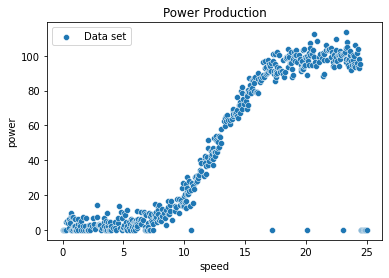

In [4]:
import seaborn as sns

# visualise the data using a scatterplot [5]
sns.scatterplot(data=df, x="speed", y="power", label = "Data set")
plt.title("Power Production")
plt.show()

## Initial Visual Analysis
The scatterplot above shows that there is a relatively low Power output (represented on the y axis) while the Speed is at values between 0 and 10 (x axis). However when Speed increases above 10 there is a noticable increase in Power.  This continues up until Speed reaches about 17 and Power levels off while Speed continues to increase up to 25.<br>
It is also worth nothing that a smaller number of data points between 10 and 25 on the x axis have corresponding y values equal to 0. This does not fit the visual trend of the rest of the data and may indicate outliers that may be due to measurement errors. This would need further investigation as it will likely bias any statistical analysis carried out. 

## Initial Linear Regression

[  4.91759567 -13.89990263]


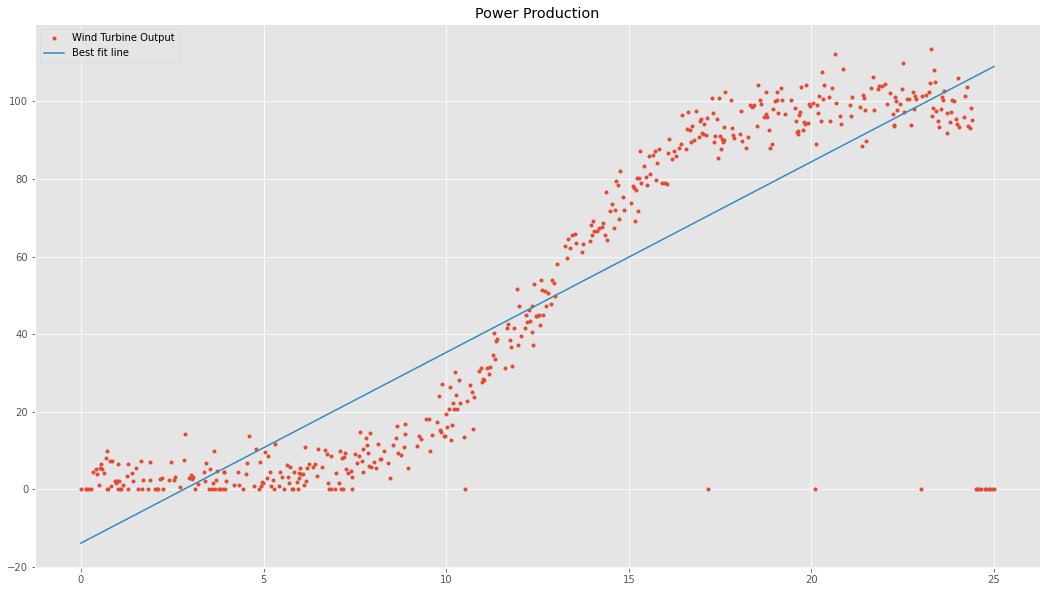

In [5]:
# to complete a simple linear regression using polyfit in Matplotlib
# first plot the data points
plt.style.use("ggplot")
plt.rcParams["figure.figsize"]=(18,10)

plt.plot(x, y, ".", label="Wind Turbine Output")
#then determine the coefficients
coeffs = np.polyfit(x, y, 1)
print(coeffs)
# polyfit returns the numbers that describes the line that is the best fit for the data
# so we can use the equation y = a*x + b to produce this line
y_bestfit = coeffs[0]*x + coeffs[1]
plt.plot(x, y_bestfit, label= "Best fit line")
plt.legend()
plt.title("Power Production")
plt.show()


## Subsequent Visual Analysis
So we can see that the best fit line created here to represent simple linear regression doesn't actually fit the data. Almost half of the data is curved under the line up until speed reaches approximately 17 which may indicate an overestimate of the fit. While most of the data for Power output above speed of 17 is over the line indicating a underestimate of the fit. <br>
A simple linear regression does not fit the data in this data set! <br>
I am curious if we excluded the data when Power is equal to 0 would we see a different representation.


In [6]:
#lets ignore the data where Power is equal to 0 and filter this out of the Data Frame
new_df=df[df["power"]>0]
new_df

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


[  5.61882784 -19.83768545]


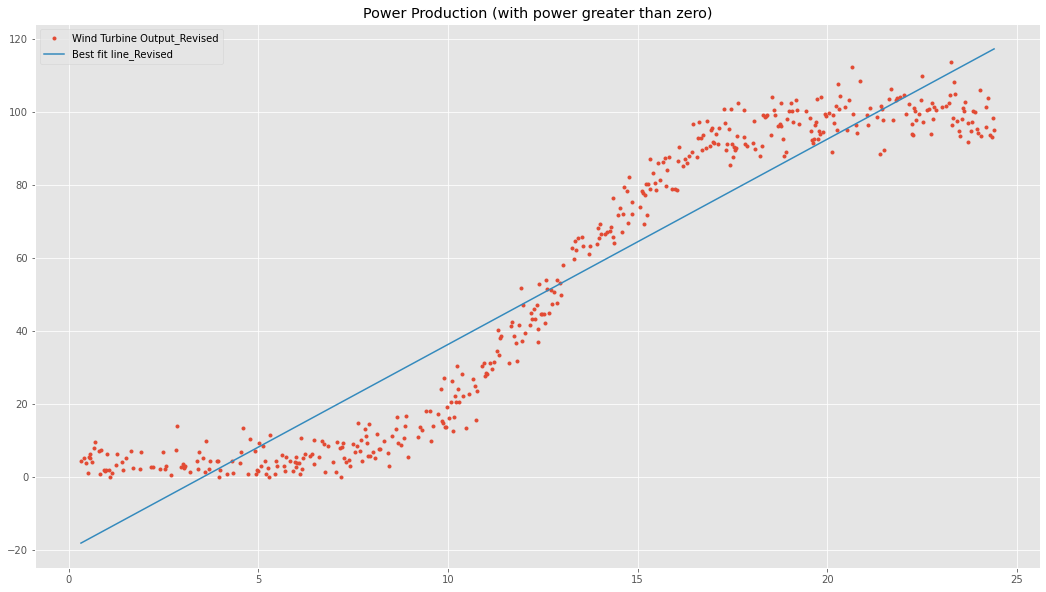

In [7]:
new_x = new_df["speed"]
new_y = new_df["power"]

plt.plot(new_x, new_y, ".", label="Wind Turbine Output_Revised")

#then determine the coefficients
new_coeffs = np.polyfit(new_x, new_y, 1)
print(new_coeffs)
# polyfit returns the numbers that describes the line that is the best fit for the data
# so we can use the equation y = a*x + b to produce this line
new_y_bestfit = new_coeffs[0]*new_x + new_coeffs[1]
plt.plot(new_x, new_y_bestfit, label= "Best fit line_Revised")
plt.legend()
plt.title("Power Production (with power greater than zero)")
plt.show()

## Visual analysis here suggests no real difference with new data set
So removing the data points where the power is equal to 0, removes 49 data points (just under 10% of the data) but does not significantly change the structure of plot based on visual analysis.<br>  We can see that the simple linear regression does not fit well with this data. Instead nonlinear regression may be more appropriate. Nonlinear regression can be described as a "_form of regression analysis in which observational data are modeled by a function which is a nonlinear combination of the model parameters and depends on one or more independent variables. The data are fitted by a method of successive approximations_" [6]. 

***
# Nonlinear Regression
So it is possible to fit a curve to data using SciPy [7] and this can be used to represent nonlinear regression. <br>
Non-linear least squares is the form of least squares analysis that is used to fit a set of m observations with a model that is non-linear in n unknown parameters (m ≥ n) [8]. The basis of the method is to approximate the model by a linear one and to refine the parameters by successive iterations. There are many similarities to linear least squares, but also some significant differences [8].



#### Initial attempt
Use nonlinear least squares to fit a function, f, to data [7] with inital attempt following the code in where data is simulated using the code below - code below from [7]<br>

def func(x, a, b, c):<br>
     return a * np.exp(-b * x) + c <br>
xdata = np.linspace(0, 4, 50) <br>
y = func(xdata, 2.5, 1.3, 0.5) <br>
np.random.seed(1729) <br>
y_noise = 0.2 * np.random.normal(size=xdata.size) <br>
ydata = y + y_noise <br>
plt.plot(xdata, ydata, 'b-', label='data') <br>

In [8]:
# following code from [7] and continuing onwards

from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c


xdata = df["speed"].to_numpy()
ydata = df["power"].to_numpy()


In [9]:
# Fit for the parameters a, b, c of the function func:

popt, pcov = curve_fit(func, xdata, ydata)
popt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([-48.11080561, 206.84677741,  48.11080561])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


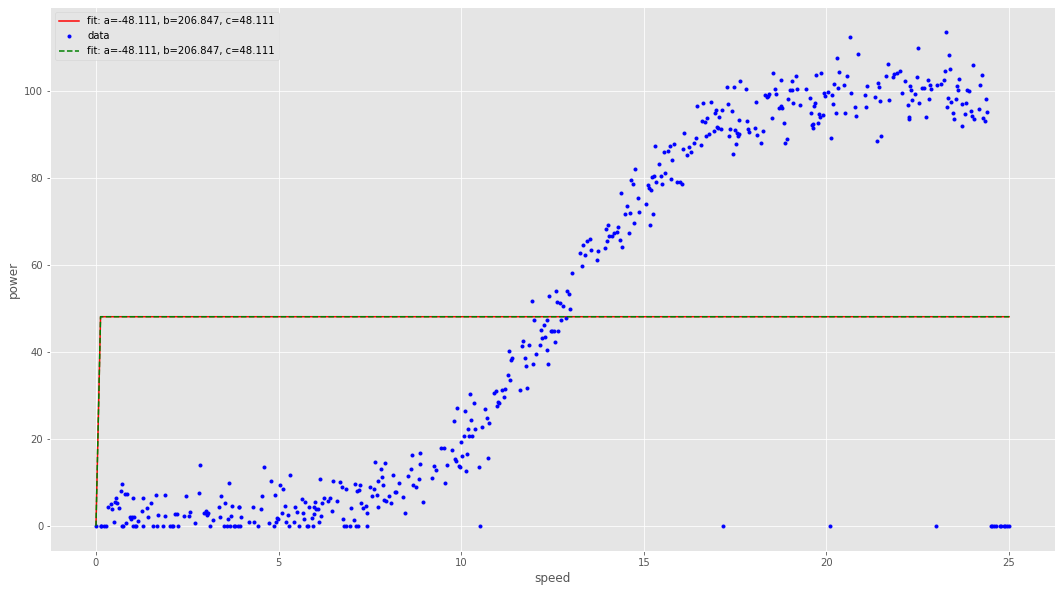

In [10]:
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

popt, pcov = curve_fit(func, xdata, ydata)
popt
plt.plot(xdata, ydata, 'b.', label='data')
plt.plot(xdata, func(xdata, *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('speed')
plt.ylabel('power')
plt.legend()
plt.show()

So clearly this hasn't worked. <br>

### Applying a different approach to the original data
I tried a different approach here following information and code from [9]

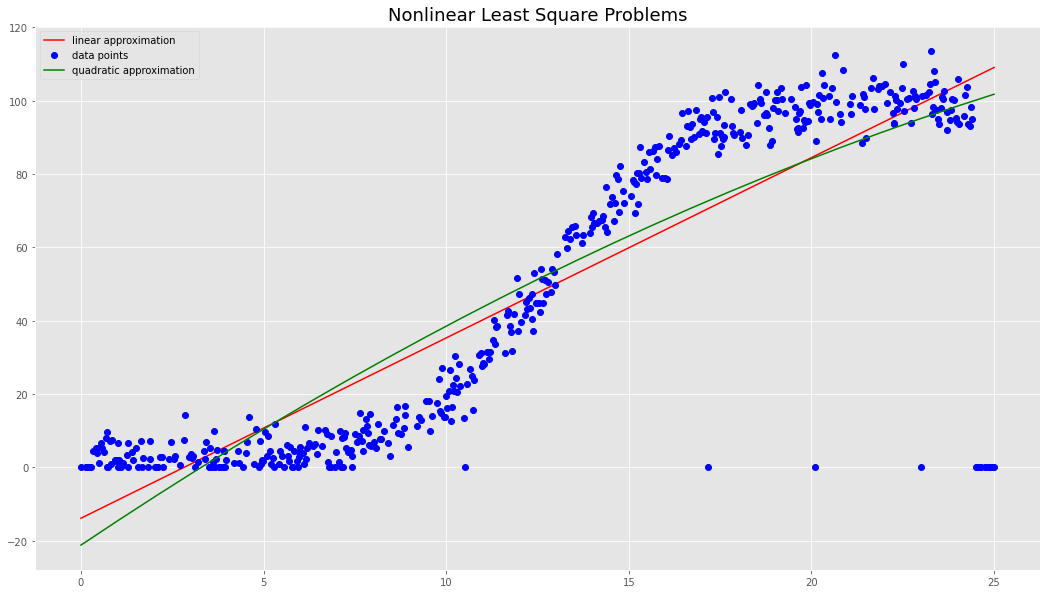

In [13]:
# using the original data set above 

import scipy as sc

fig, ax = plt.subplots ()
# data
x=xdata
y=ydata

# modeling functions
def funcLine(x, a,b):
    return a*x+b
def funcQuad(x, a, b, c):
    return a*x**2+b*x+c

# optimize constants for the linear function
constantsLine, _ = sc.optimize.curve_fit (funcLine, x, y)

X=np.linspace(x.min(),x.max(),25)
Y1=funcLine(X, *constantsLine)

# optimize constants for the quadratic function
constantsQuad, _ = sc.optimize.curve_fit (funcQuad, x, y)

Y2=funcQuad(X,*constantsQuad)
plt.plot(X,Y1,'r-',label='linear approximation')
plt.plot(x,y,'bo',label='data points')
plt.plot(X,Y2,'g-', label='quadratic approximation')
plt.legend()
ax.set_title("Nonlinear Least Square Problems", fontsize=18)
plt.show()

Although there is a curve in this line it doesn't show the two curves present in the data (at around 10 and again at 17 on the x axis).<br>
So I spoke with an Engineer friend and realised that the issue here is that the data has more than one curve and that actually the data reflects a logistic function [10]. The figure on the wikipedia page for logistic function has the same pattern as my data and an equation that is different to the function provided above.<br>  Essentially this is not a linear regression but a logistic regression [11]/
So essentially the function needed to change and with some help we created a new function with the logistic function equation and used this in the code taken from the sciPy webpage [7].<br>


<ipython-input-12-b0c4730cf16e>:2: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k*x-x0))
<ipython-input-12-b0c4730cf16e>:2: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k*x-x0))


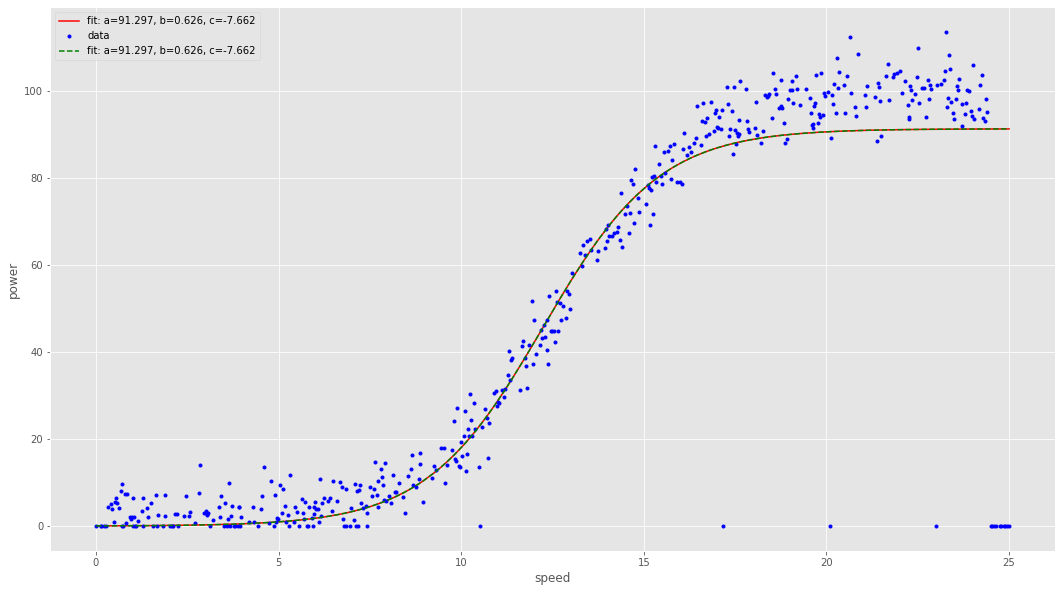

In [12]:
def func2(x, L, k, x0):
    return L / (1 + np.exp(-k*x-x0))

popt, pcov = curve_fit(func2, xdata, ydata)
popt

plt.plot(xdata, func2(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
#Constrain the optimization to the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5:
popt, pcov = curve_fit(func2, xdata, ydata)
popt
plt.plot(xdata, ydata, 'b.', label='data')
plt.plot(xdata, func2(xdata, *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('speed')
plt.ylabel('power')
plt.legend()
plt.show()

And low and behold, it fits the data but better than the linear regression model! <br>
<br>
As a disclaimer, I got help with defining the last function _func2()_ and I have copied the code for the attempts at fitting the curve above, but I definitely gained a huge amount of learning and experience trying to complete this project.

## The End.